**INTRODUCTION AND PROJECT OVERVIEW**

The aim of this project is to explore how the returns of different classes of commodity futures behave during periods of economic downturn. By the end of this project, I will have identified strong relationships between the returns of certain commodities during tough economic periods.

I also aim to predict the returns on Crude Oil Futures during the COVID lockdown.

Data for this project was sourced from:

https://www.kaggle.com/datasets/mattiuzc/commodity-futures-price-history?select=Commodity+Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
brent = pd.read_csv("/content/Brent Crude Oil.csv")
cocoa = pd.read_csv("/content/Cocoa.csv")
coffee = pd.read_csv("/content/Coffee.csv")
copper = pd.read_csv("/content/Copper.csv")
corn = pd.read_csv("/content/Corn.csv")
crude = pd.read_csv("/content/Crude Oil.csv")
gold = pd.read_csv("/content/Gold.csv")
natural_gas = pd.read_csv("/content/Natural Gas.csv")
platinum = pd.read_csv("/content/Platinum.csv")
silver = pd.read_csv("/content/Silver.csv")
sugar = pd.read_csv("/content/Sugar.csv")
wheat = pd.read_csv("/content/Wheat.csv")

In [3]:
datasets = [brent, cocoa, coffee, copper, corn, crude, gold, natural_gas, platinum, silver, sugar, wheat]

for df in datasets:
  df["Date"] = pd.to_datetime(df["Date"])
  df.fillna(method="ffill", inplace=True)
  df.loc[0, "Returns"] = (df.loc[0, "Close"] - df.loc[0, "Open"])/df.loc[0, "Open"] # For first rows in dfs
  df["Returns"] = (df["Close"].shift(-1) - df["Close"]) / df["Close"] # For all other rows
  df = df.drop(columns=["High", "Low", "Open", "Close", "Adj Close", "Volume"], inplace=True)

In [4]:
for df, commodity in zip(datasets, ["brent", "cocoa", "coffee", "copper", "corn", "crude", "gold", "natural_gas", "platinum", "silver", "sugar", "wheat"]):
    df.rename(columns=lambda x: f"{commodity}_{x}" if x != "Date" else x, inplace=True)

# Merging datasets on "Date"
merged_df = datasets[0]
for df in datasets[1:]:
    merged_df = pd.merge(merged_df, df, on="Date", how="left")


In [5]:
merged_df.head()

,Date,brent_Returns,cocoa_Returns,coffee_Returns,copper_Returns,corn_Returns,crude_Returns,gold_Returns,natural_gas_Returns,platinum_Returns,silver_Returns,sugar_Returns,wheat_Returns
0,2007-07-30,0.017296,0.005697,0.011952,0.017121,0.006955,0.017962,0.004216,-0.047392,0.012298,0.009038,0.030938,-0.004747
1,2007-07-31,-0.022064,-0.012873,-0.010499,-0.016012,-0.020721,-0.021481,-0.004948,0.026005,-0.008996,-0.004788,-0.004840,0.005564
2,2007-08-01,0.005441,-0.001565,0.027409,-0.005563,0.015674,0.004312,0.001507,-0.038728,0.006284,0.003647,-0.002918,0.003162
3,2007-08-02,-0.013332,-0.010972,0.012479,-0.025315,0.007716,-0.017955,0.011887,-0.002620,-0.000771,0.012756,0.000000,0.008274
4,2007-08-03,-0.047893,-0.014263,0.006375,-0.001722,-0.002297,-0.045310,-0.001487,0.019376,0.000772,-0.009389,-0.030244,0.012114


As we are interested in periods of economic downturn, this project will be limited to the following dates:

- December 1st 2007 untill June 30 2009 (US Financial Crisis)
- February 1st 2020 untill December 31st 2020 (COVID Imposed Lockdowns)

In [6]:
first = ((merged_df["Date"] >= "2007-12-01") & (merged_df["Date"] <= "2009-06-30"))
second = ((merged_df["Date"] >= "2020-02-01") & (merged_df["Date"] <= "2020-12-31"))
us_crisis = merged_df[first]
covid = merged_df[second]


**RELATIONSHIP BETWEEN THE RETURNS OF VARIOUS COMMODITIES DURING ECONOMIC DOWNTURN**

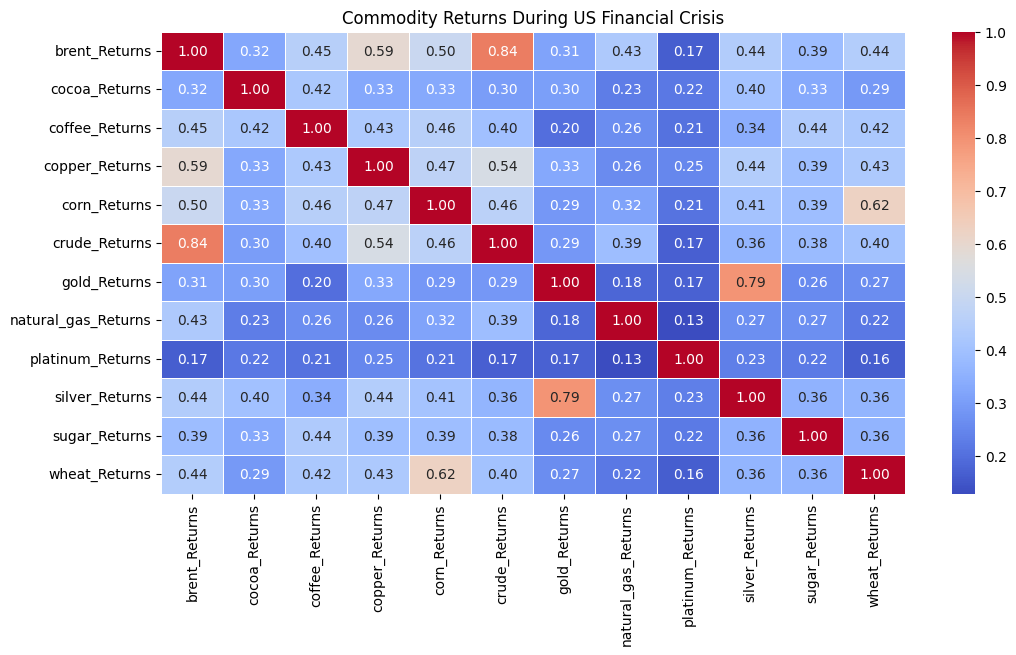

In [7]:
corr_matrix = us_crisis.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Commodity Returns During US Financial Crisis")
plt.show()

**OBSERVATIONS DURING FINANCIAL CRISIS**

- Brent and crude returns had a very strong positive relationship.
- So did Gold and Silver.
- Corn and Wheat, Copper and Brent, Crude and Copper all had relatively strong positive relationships.
- A strong positive relationship means the returns on these commodity futures moved in unison.

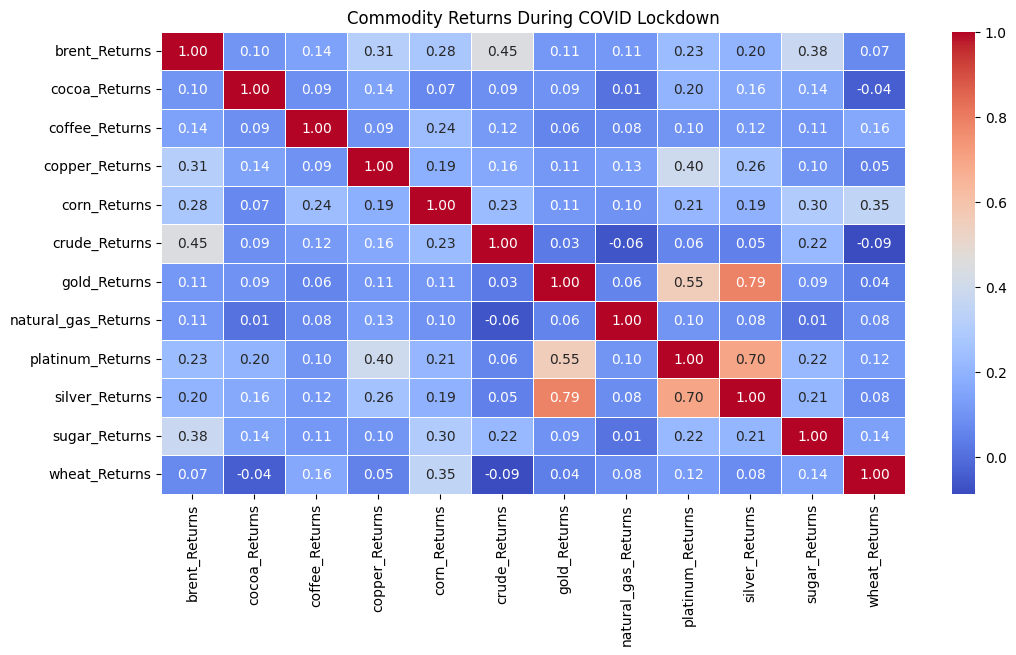

In [8]:
corr_matrix_2 = covid.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix_2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Commodity Returns During COVID Lockdown")
plt.show()

**OBSERVATIONS FROM COVID LOCKDOWN**

- Rather unsurprisingly, the returns on Gold and Silver have the strongest relationship during periods of economic downturn and tend to move in the same direction.
- Platinum and Silver also had a strong positive relationship, the same goes for Gold and Platinum.

Why don't we visualize the returns for both commodity groups.

**GOLD AND SILVER**

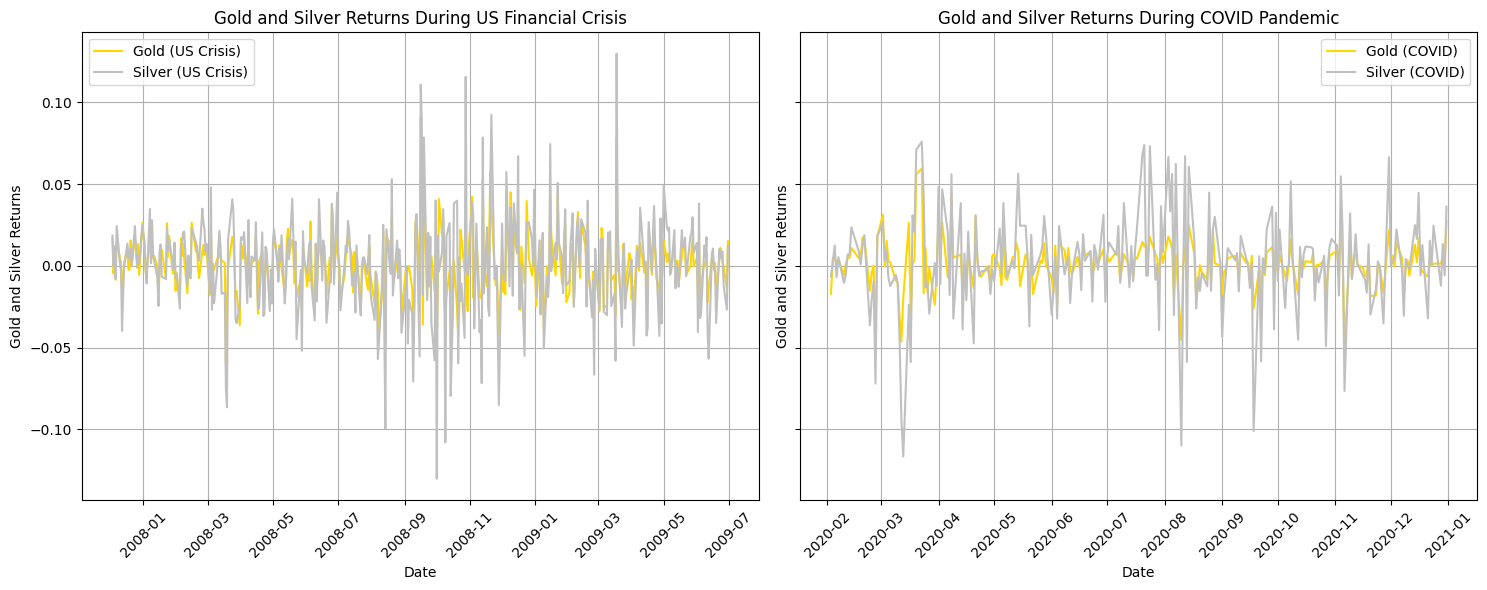

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Gold and silver returns during the US financial crisis
axs[0].plot(us_crisis["Date"], us_crisis["gold_Returns"], label="Gold (US Crisis)", color="gold")
axs[0].plot(us_crisis["Date"], us_crisis["silver_Returns"], label="Silver (US Crisis)", color="silver")
axs[0].set_title("Gold and Silver Returns During US Financial Crisis")
axs[0].tick_params(axis="x", rotation=45)
axs[0].legend()

# Gold and silver returns during the COVID pandemic
axs[1].plot(covid["Date"], covid["gold_Returns"], label="Gold (COVID)", color="gold")
axs[1].plot(covid["Date"], covid["silver_Returns"], label="Silver (COVID)", color="silver")
axs[1].set_title("Gold and Silver Returns During COVID Pandemic")
axs[1].tick_params(axis="x", rotation=45)
axs[1].legend()

for ax in axs:
    ax.set_ylabel("Gold and Silver Returns")
    ax.set_xlabel("Date")
    ax.grid(True)


plt.tight_layout()

plt.show()

**OBSERVATIONS**

- Logically, Gold returns are less volatile than Silver returns during times of economic distress.
- However, it is very clear to see that returns on both metals have a very strong tendency to move in the same direction.

**BRENT AND CRUDE**

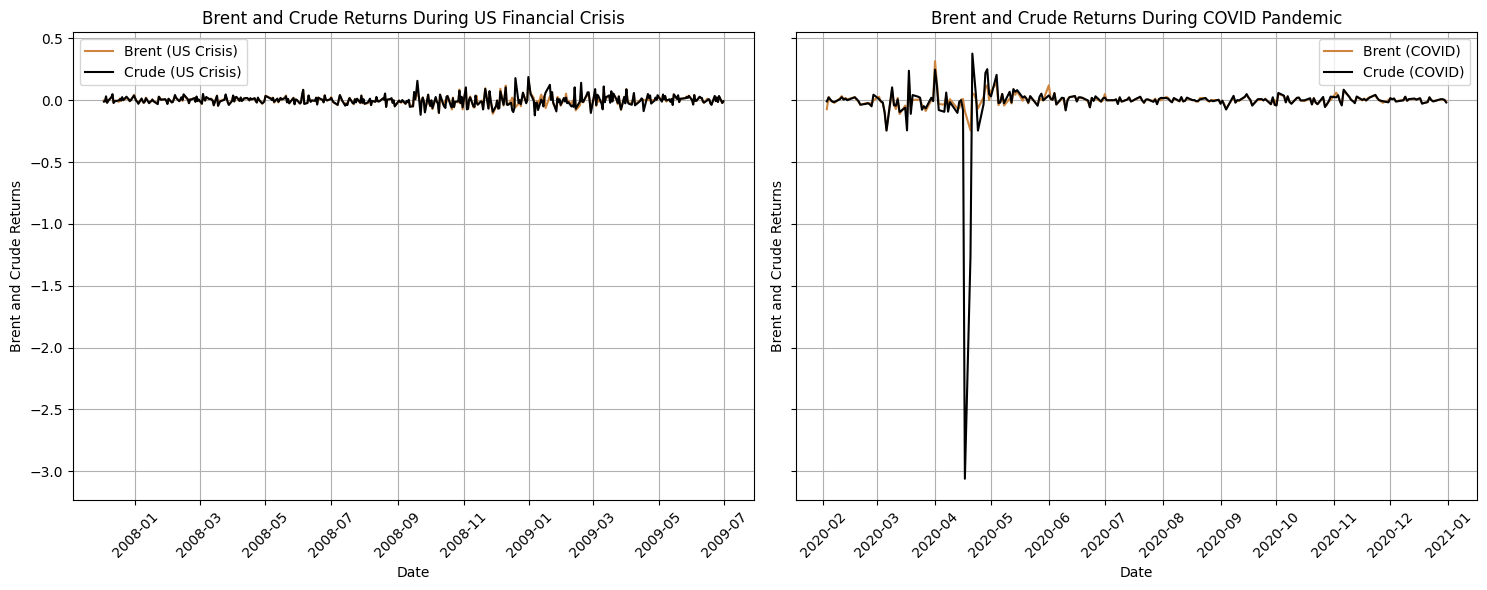

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15,6), sharey=True)

# Brent and Crude Returns US Crisis
axs[0].plot(us_crisis["Date"], us_crisis["brent_Returns"], label="Brent (US Crisis)", color = "peru")
axs[0].plot(us_crisis["Date"], us_crisis["crude_Returns"], label="Crude (US Crisis)", color = "black")
axs[0].set_title("Brent and Crude Returns During US Financial Crisis")
axs[0].tick_params(axis="x", rotation=45)
axs[0].legend()

# Brent and Crude Returns COVID Pandemic
axs[1].plot(covid["Date"], covid["brent_Returns"], label="Brent (COVID)", color = "peru")
axs[1].plot(covid["Date"], covid["crude_Returns"], label="Crude (COVID)", color = "black")
axs[1].set_title("Brent and Crude Returns During COVID Pandemic")
axs[1].tick_params(axis="x", rotation=45)
axs[1].legend()

for ax in axs:
  ax.set_ylabel("Brent and Crude Returns")
  ax.set_xlabel("Date")
  ax.grid(True)

plt.tight_layout()

plt.show()

**OBSERVATIONS**

- Brent and Crude Oil Returns display similar patterns during times of economic distress.
- Crude Oil returns were relatively volatile during the early stages of the COVID pandemic.
- Returns tend to hover around 0 with the exception of a few outlier situations. Most notably US oil prices falling below 0 due to excess supply cause by COVID lockdown.
- The behaviour of Crude Returns after reaching abnormal levels (for periods of economic distress) will be further investigated.

**CORN AND WHEAT**

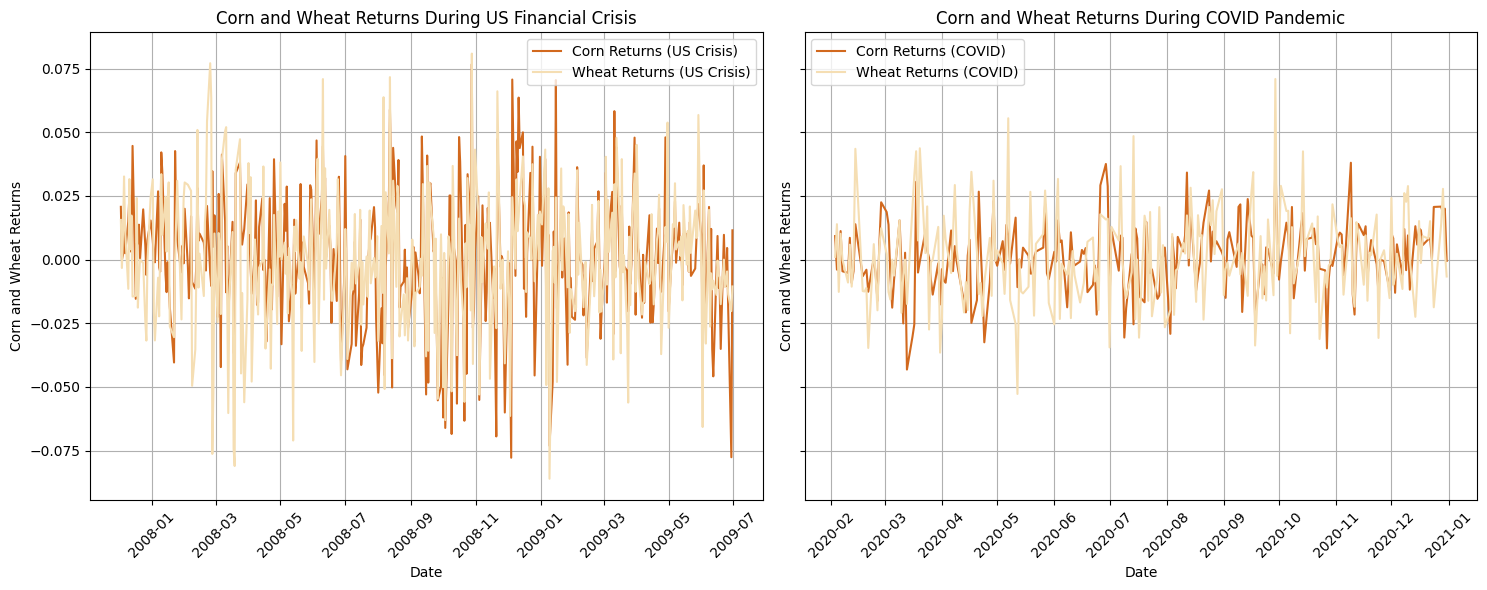

In [11]:
figs, axs = plt.subplots(1, 2, figsize=(15,6), sharey=True)

# Corn and Wheat Returns during US Financial Crises
axs[0].plot(us_crisis["Date"], us_crisis["corn_Returns"], label="Corn Returns (US Crisis)", color="chocolate")
axs[0].plot(us_crisis["Date"], us_crisis["wheat_Returns"], label="Wheat Returns (US Crisis)", color="wheat")
axs[0].set_title("Corn and Wheat Returns During US Financial Crisis")
axs[0].tick_params(axis="x", rotation=45)
axs[0].legend()

# Corn and Wheat returns during COVID pandemic
axs[1].plot(covid["Date"], covid["corn_Returns"], label="Corn Returns (COVID)", color="chocolate")
axs[1].plot(covid["Date"], covid["wheat_Returns"], label="Wheat Returns (COVID)", color="wheat")
axs[1].set_title("Corn and Wheat Returns During COVID Pandemic")
axs[1].tick_params(axis="x", rotation=45)
axs[1].legend()

for ax in axs:
  ax.set_ylabel("Corn and Wheat Returns")
  ax.set_xlabel("Date")
  ax.grid(True)

plt.tight_layout()

plt.show()

**COPPER AND BRENT**

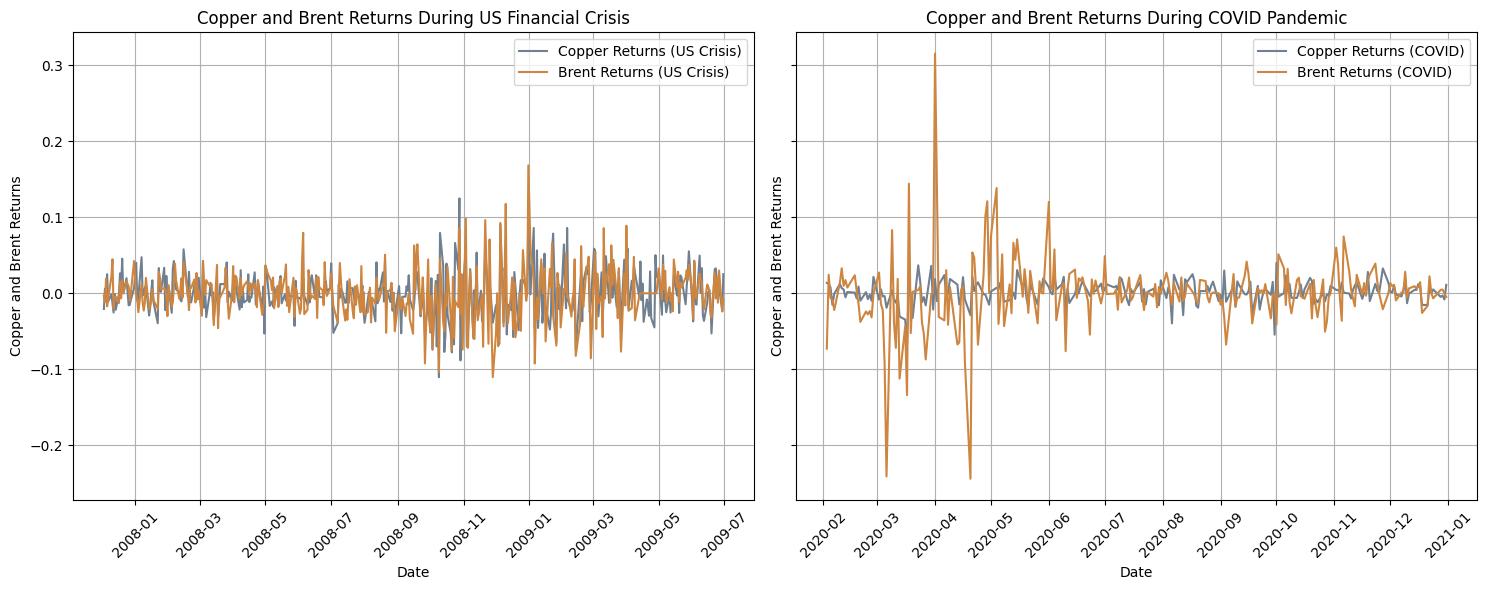

In [12]:
figs, axs = plt.subplots(1, 2, figsize=(15,6), sharey=True)

# Copper and Brent Returns during US Financial Crises
axs[0].plot(us_crisis["Date"], us_crisis["copper_Returns"], label="Copper Returns (US Crisis)", color="slategray")
axs[0].plot(us_crisis["Date"], us_crisis["brent_Returns"], label="Brent Returns (US Crisis)", color="peru")
axs[0].set_title("Copper and Brent Returns During US Financial Crisis")
axs[0].tick_params(axis="x", rotation=45)
axs[0].legend()

# Copper and Brent returns during COVID pandemic
axs[1].plot(covid["Date"], covid["copper_Returns"], label="Copper Returns (COVID)", color="slategray")
axs[1].plot(covid["Date"], covid["brent_Returns"], label="Brent Returns (COVID)", color="peru")
axs[1].set_title("Copper and Brent Returns During COVID Pandemic")
axs[1].tick_params(axis="x", rotation=45)
axs[1].legend()

for ax in axs:
  ax.set_ylabel("Copper and Brent Returns")
  ax.set_xlabel("Date")
  ax.grid(True)

plt.tight_layout()

plt.show()

**OBSERVATIONS**

- During the US Financial Crises, the relationship between Copper and Brent returns were stronger.
- Brent Returns were more volatile during the COVID pandemic.

**CRUDE OIL RETURNS DURING COVID PANDEMIC**

- Global supply chains were severely disrupted.
- Reduced Demand due to lockdown.
- How were returns behaving during this period ?

In [13]:
# Defining Outliers
mean_returns = covid["crude_Returns"].mean()
st_dev_returns = covid["crude_Returns"].std()

upper_fence = mean_returns + (2*st_dev_returns)
lower_fence = mean_returns - (2*st_dev_returns)


upper_outliers = covid[covid["crude_Returns"] > upper_fence]
lower_outliers = covid[covid["crude_Returns"] < lower_fence]

# Figuring out number of outlier returns
print(len(upper_outliers))
print(len(lower_outliers))

0
2


In [14]:
lower_outliers

,Date,brent_Returns,cocoa_Returns,coffee_Returns,copper_Returns,corn_Returns,crude_Returns,gold_Returns,natural_gas_Returns,platinum_Returns,silver_Returns,sugar_Returns,wheat_Returns
3203,2020-04-17,-0.089387,-0.017234,-0.020681,-0.008073,-0.024825,-3.059661,0.007341,0.097547,0.013695,0.020936,-0.029894,0.034465
3204,2020-04-20,-0.244036,-0.017109,-0.035196,-0.028914,-0.015911,-1.266011,-0.013752,-0.053534,-0.042929,-0.047442,-0.030815,0.003029


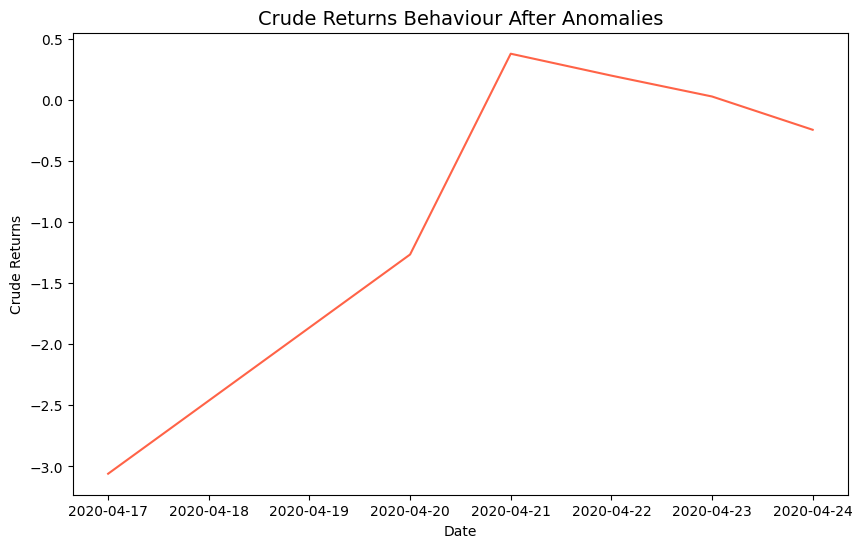

In [15]:
week = ((covid["Date"] >= "2020-04-17") & (covid["Date"] <= "2020-04-24"))
dummy = covid[week].copy()

plt.figure(figsize=(10,6))
plt.plot(dummy["Date"], dummy["crude_Returns"], color="tomato")
plt.xlabel("Date")
plt.ylabel("Crude Returns")
plt.title("Crude Returns Behaviour After Anomalies", fontsize=14)
plt.show()

**OBSERVATIONS**

- The 18th and 19th of April 2020 was a Saturday and Sunday respectively, so data on the returns for crude were unavailable.
- On the 20th of April, Crude Returns rebounded positively and the trend followed on the 21st before declining on the 22nd, 23rd and 24th.
- The sample size is too small to come to any tangible conclusions.

**PREDICTING CRUDE OIL RETURNS DURING THE COVID PANDEMIC**

I have decided to try my hand at forecasting the returns on Crude Oil Future's contract during the pandemic for the following reasons:

- Strictly speaking in terms of the Crude Oil market and its dynamics, the pandemic was a period of extreme disruption to Crude Oil supply chains.
- This led to more volatile returns as the market reacted to these shocks to the supply chain.
- The financial crises did not cause as much of a disruption to crude oil supply chains although it is most likely to have caused a reduction in demand.
- By attempting to forecast the returns during the pandemic, this scenario could be "replayed" in periods of brief (or not) shocks to the Crude Oil supply chain.

I will be using time series analysis for this task.

<Figure size 1000x600 with 0 Axes>

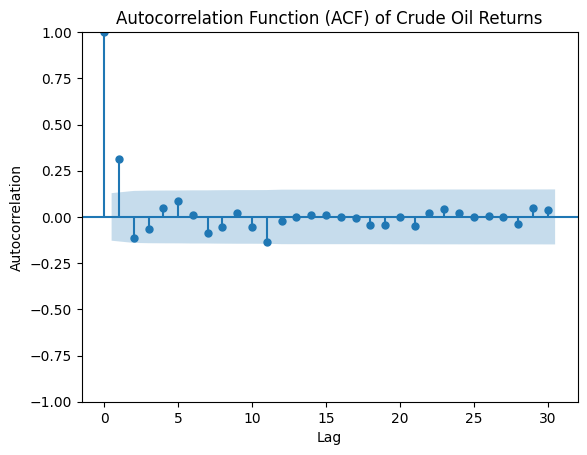

In [16]:
# Checking for autocorrelation

from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(covid["crude_Returns"], lags=30, alpha=0.05)
plt.title("Autocorrelation Function (ACF) of Crude Oil Returns")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

There is some autocorrelation.

<Figure size 1000x600 with 0 Axes>

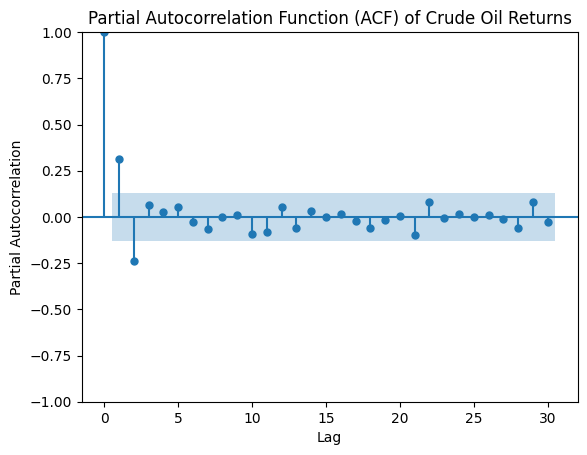

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(10, 6))
plot_pacf(covid["crude_Returns"], lags=30, alpha=0.05)
plt.title("Partial Autocorrelation Function (ACF) of Crude Oil Returns")
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.show()

In [18]:
# Checking if Crude Returns (During COVID Pandemic) are Stationary

from statsmodels.tsa.stattools import adfuller

result = adfuller(covid["crude_Returns"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -11.256509721030467
p-value: 1.6619901400401288e-20


As the p-value is less than 0.01, we can conclude that the crude returns during the COVID pandemic are stationary.

In [19]:
from statsmodels.tsa.arima.model import ARIMA
winner = (2,1,1)
model = ARIMA(covid["crude_Returns"], order=winner)
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          crude_Returns   No. Observations:                  232
Model:                 ARIMA(2, 1, 1)   Log Likelihood                  31.577
Date:                Tue, 26 Mar 2024   AIC                            -55.154
Time:                        22:45:04   BIC                            -41.384
Sample:                             0   HQIC                           -49.600
                                - 232                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3883      0.195      1.990      0.047       0.006       0.771
ar.L2         -0.2333      0.094     -2.473      0.013      -0.418      -0.048
ma.L1         -0.9953      0.167     -5.970      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


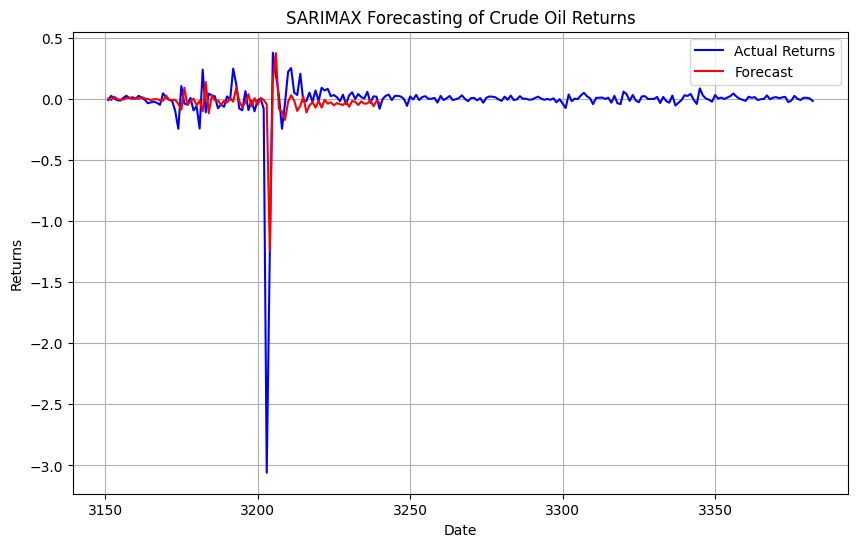

In [20]:
# PREDICTION TIME

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMAX model
model = SARIMAX(covid["crude_Returns"], order=winner)
results = model.fit()

# Generate forecasts
forecast = results.get_prediction(start=0, end=89)

# Visualizing model performance
plt.figure(figsize=(10, 6))
plt.plot(covid["crude_Returns"].index, covid["crude_Returns"], label="Actual Returns", color="blue")
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean.values, color="red", label="Forecast")
plt.title("SARIMAX Forecasting of Crude Oil Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.grid(True)
plt.show()
